In [124]:
import pandas as pd
import seaborn as sns; sns.set_theme(color_codes=True)
import matplotlib.pyplot as plt
import calendar

In [125]:
# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context("poster")
sns.set(rc={"figure.figsize": (16.,8.)})
sns.set_style("whitegrid")

## Loading the data 

In [126]:
df_merged = pd.read_csv(r".\cleaned_data\02. Quandl\df_merged_quandl.csv") # open the dataframe
df_merged['Date'] = df_merged["Date"].astype('datetime64[ns]') # change the date from object to datatime - important for visalization
df_merged

,Date,M2,S&P 500,CPI,RE Loan,Initial Claims,Revolving Credit,index,PMI
0,1871-01-01,NaN,105.76,NaN,NaN,NaN,NaN,NaN,NaN
1,1871-02-01,NaN,104.02,NaN,NaN,NaN,NaN,NaN,NaN
2,1871-03-01,NaN,105.01,NaN,NaN,NaN,NaN,NaN,NaN
3,1871-04-01,NaN,112.01,NaN,NaN,NaN,NaN,NaN,NaN
4,1871-05-01,NaN,117.56,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1818,2022-07-01,21578.8,3918.75,296.276,247933.0,NaN,NaN,NaN,NaN
1819,2022-08-01,21546.4,4167.51,296.171,247482.8,NaN,NaN,NaN,NaN
1820,2022-09-01,21459.5,3850.52,296.808,248786.1,NaN,NaN,NaN,NaN
1821,2022-10-01,21362.5,3726.05,298.012,250692.6,NaN,NaN,NaN,NaN


In [127]:
df_merged_2 = pd.read_csv(r".\cleaned_data\02. Quandl\df_merged_2_quandl.csv") # Open the dataframe
df_merged_2['Date'] = df_merged_2["Date"].astype('datetime64[ns]') # Change the date from object to datatime - important for visalization
df_merged_2

,Date,S&P 500,GDP,Cons. Sent.,US Big Mac
0,1871-01-01,105.76,NaN,NaN,NaN
1,1871-02-01,104.02,NaN,NaN,NaN
2,1871-03-01,105.01,NaN,NaN,NaN
3,1871-04-01,112.01,NaN,NaN,NaN
4,1871-05-01,117.56,NaN,NaN,NaN
...,...,...,...,...,...
1818,2022-07-01,3918.75,NaN,51.5,5.15
1819,2022-08-01,4167.51,NaN,58.2,NaN
1820,2022-09-01,3850.52,NaN,58.6,NaN
1821,2022-10-01,3726.05,NaN,59.9,NaN


## Visualization 

[Text(0.5, 1.0, 'Consumer Price Index')]

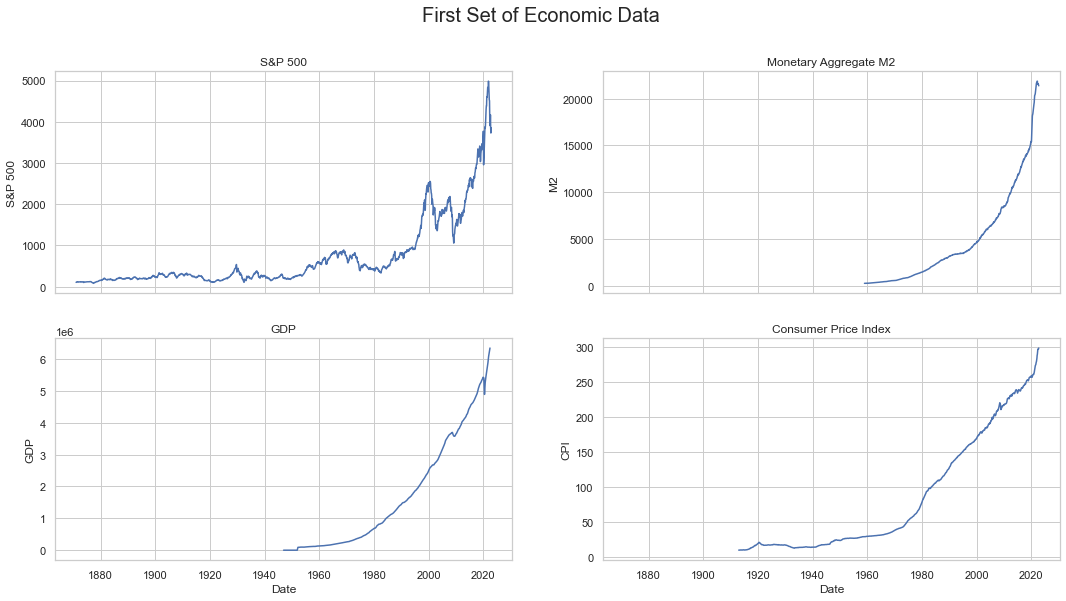

In [128]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(18,9))
figure.suptitle('First Set of Economic Data', fontsize=20)

sns.lineplot(ax=axes[0, 0], data=df_merged, x='Date', y='S&P 500').set(title='S&P 500')
sns.lineplot(ax=axes[0, 1], data=df_merged, x='Date', y='M2').set(title='Monetary Aggregate M2')
sns.lineplot(ax=axes[1, 0], data=df_merged_2, x='Date', y='GDP').set(title='GDP')
sns.lineplot(ax=axes[1, 1], data=df_merged, x='Date', y='CPI').set(title='Consumer Price Index')

[Text(0.5, 1.0, 'US Big Mac')]

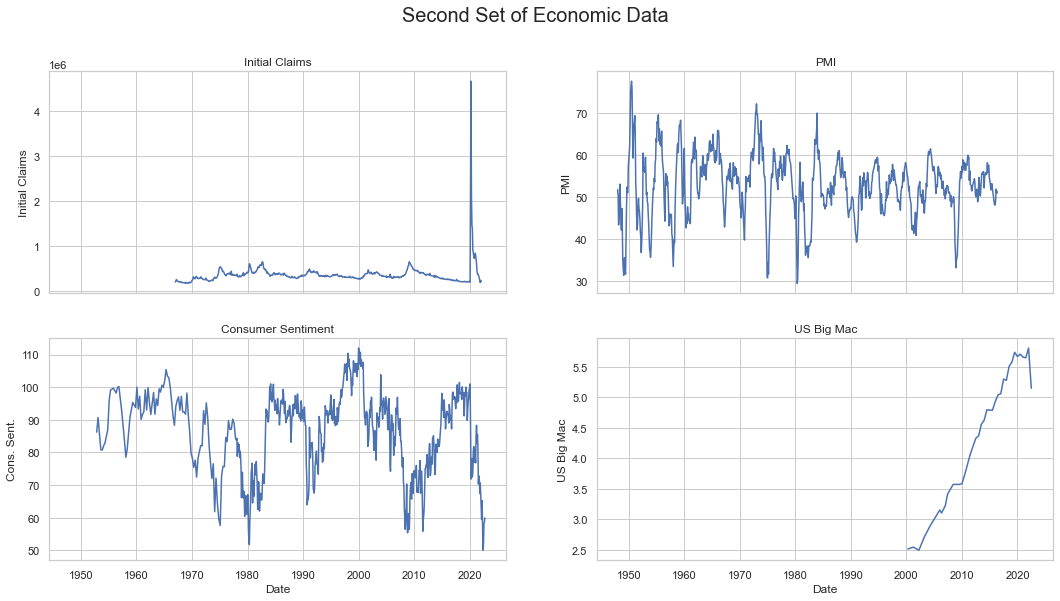

In [129]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(18,9))
figure.suptitle('Second Set of Economic Data', fontsize=20)

sns.lineplot(ax=axes[0, 0], data=df_merged, x='Date', y='Initial Claims').set(title='Initial Claims')
sns.lineplot(ax=axes[0, 1], data=df_merged, x='Date', y='PMI').set(title='PMI')
sns.lineplot(ax=axes[1, 0], data=df_merged_2, x='Date', y='Cons. Sent.').set(title='Consumer Sentiment')
sns.lineplot(ax=axes[1, 1], data=df_merged_2, x='Date', y='US Big Mac').set(title='US Big Mac')

[Text(0.5, 1.0, 'Revolving Credit')]

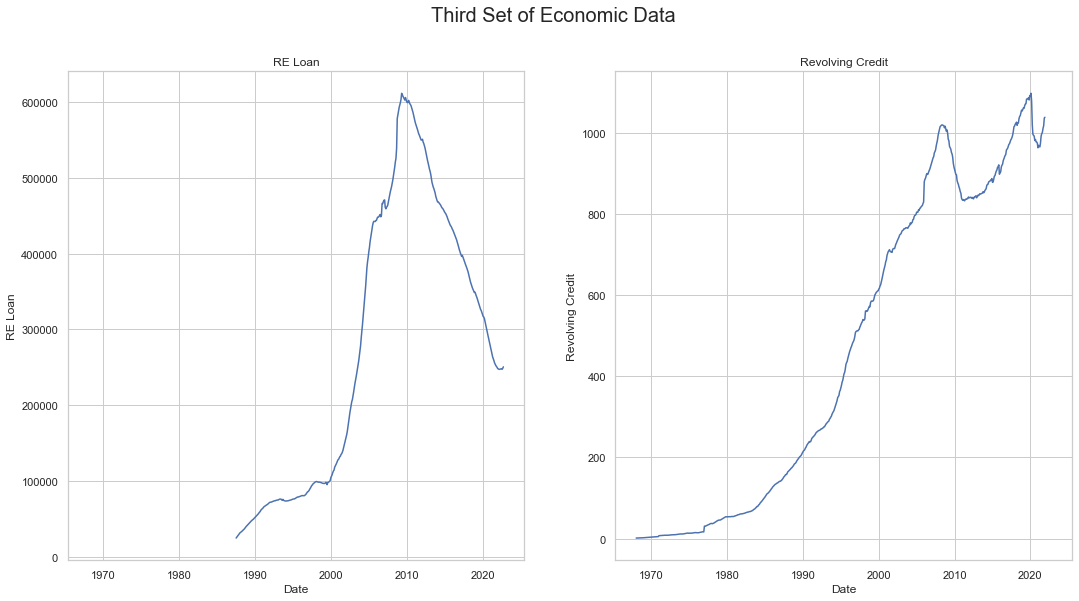

In [130]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(18,9))
figure.suptitle('Third Set of Economic Data', fontsize=20)

sns.lineplot(ax=axes[0], data=df_merged, x='Date', y='RE Loan').set(title='RE Loan')
sns.lineplot(ax=axes[1], data=df_merged, x='Date', y='Revolving Credit').set(title='Revolving Credit')

## Correlation matrix  

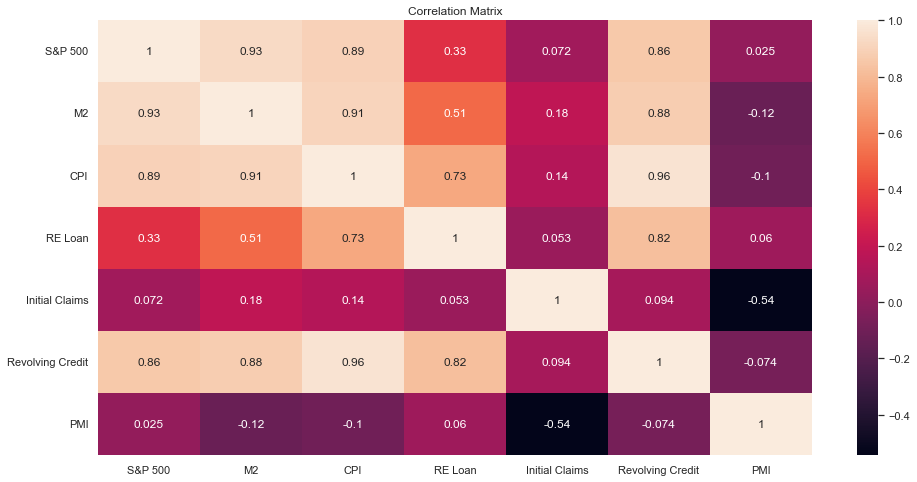

In [131]:
corr_matrix = df_merged[['S&P 500','M2','CPI', 'RE Loan','Initial Claims', 'Revolving Credit', 'PMI']].corr()
sns.heatmap(corr_matrix, annot=True).set(title='Correlation Matrix')
plt.show()

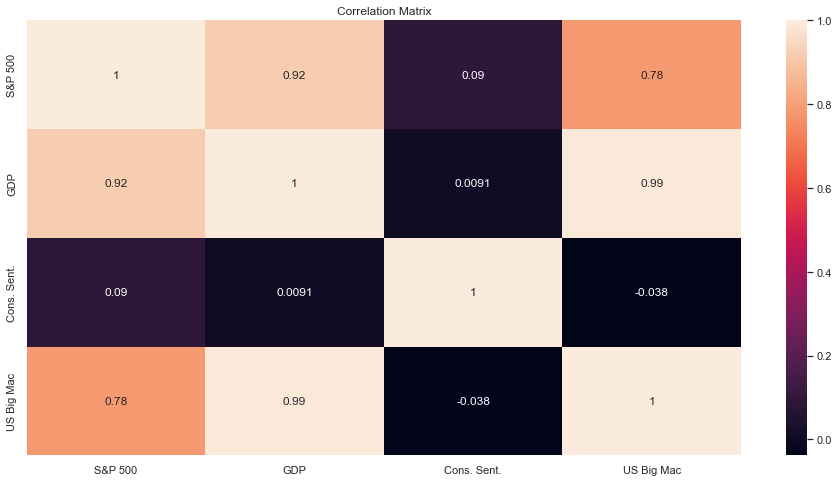

In [132]:
corr_matrix_2 = df_merged_2[['S&P 500','GDP','Cons. Sent.', 'US Big Mac']].corr()
sns.heatmap(corr_matrix_2, annot=True).set(title='Correlation Matrix')
plt.show()

## Monthly Returns

In [133]:
df_merged['monthly_return'] = (df_merged['S&P 500']/ df_merged['S&P 500'].shift(1)) -1
df_merged['monthly_return']
df = pd.DataFrame(df_merged['monthly_return']) 

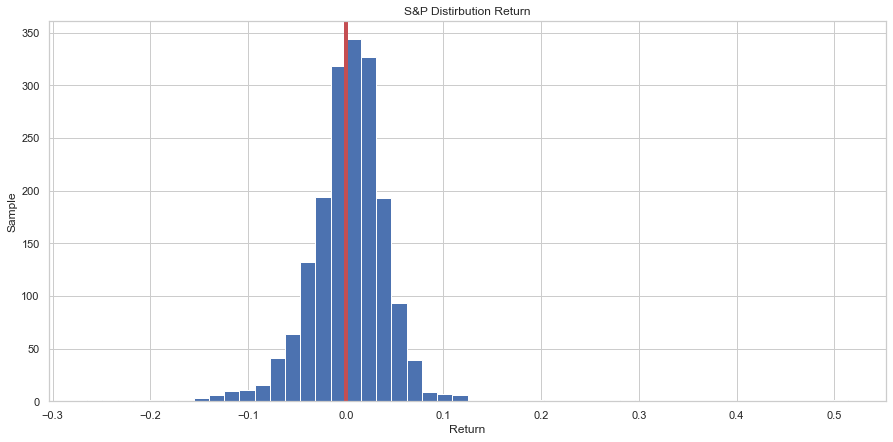

In [134]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
df_merged['monthly_return'].hist(bins=50, ax=ax1)
ax1.set_xlabel('Return')
ax1.set_ylabel('Sample')
ax1.set_title('S&P Distirbution Return')
plt.axvline(x=0, color='r', linewidth=4, linestyle='-')
plt.show()

In [135]:
pos_count, neg_count = 0, 0

for num in df['monthly_return']:
    if num >= 0:
        pos_count += 1
    else:
        neg_count += 1

print("Positive numbers in the list: ", pos_count)
print("Negative numbers in the list: ", neg_count)

Positive numbers in the list:  1032
Negative numbers in the list:  791


## Annual Returns

In [136]:
df_merged

,Date,M2,S&P 500,CPI,RE Loan,Initial Claims,Revolving Credit,index,PMI,monthly_return
0,1871-01-01,NaN,105.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1871-02-01,NaN,104.02,NaN,NaN,NaN,NaN,NaN,NaN,-0.016452
2,1871-03-01,NaN,105.01,NaN,NaN,NaN,NaN,NaN,NaN,0.009517
3,1871-04-01,NaN,112.01,NaN,NaN,NaN,NaN,NaN,NaN,0.066660
4,1871-05-01,NaN,117.56,NaN,NaN,NaN,NaN,NaN,NaN,0.049549
...,...,...,...,...,...,...,...,...,...,...
1818,2022-07-01,21578.8,3918.75,296.276,247933.0,NaN,NaN,NaN,NaN,0.003395
1819,2022-08-01,21546.4,4167.51,296.171,247482.8,NaN,NaN,NaN,NaN,0.063479
1820,2022-09-01,21459.5,3850.52,296.808,248786.1,NaN,NaN,NaN,NaN,-0.076062
1821,2022-10-01,21362.5,3726.05,298.012,250692.6,NaN,NaN,NaN,NaN,-0.032326


In [137]:
df = df_merged[['Date','S&P 500']]
df['annual_return'] = (df['S&P 500']/ df['S&P 500'].shift(12)) -1
df = df.iloc[::12,:]

C:\Users\rapha\AppData\Local\Temp\ipykernel_43296\3349384146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['annual_return'] = (df['S&P 500']/ df['S&P 500'].shift(12)) -1


,Date,S&P 500,annual_return
1773,2018-10-01,3269.26,0.062545
1774,2018-11-01,3206.96,0.027608
1775,2018-12-01,3033.03,-0.054480
1776,2019-01-01,3074.52,-0.079661
1777,2019-02-01,3234.74,0.003123
1778,2019-03-01,3273.95,0.018478
1779,2019-04-01,3372.64,0.072856
1780,2019-05-01,3308.58,0.038132
1781,2019-06-01,3349.01,0.032294
1782,2019-07-01,3465.98,0.053393


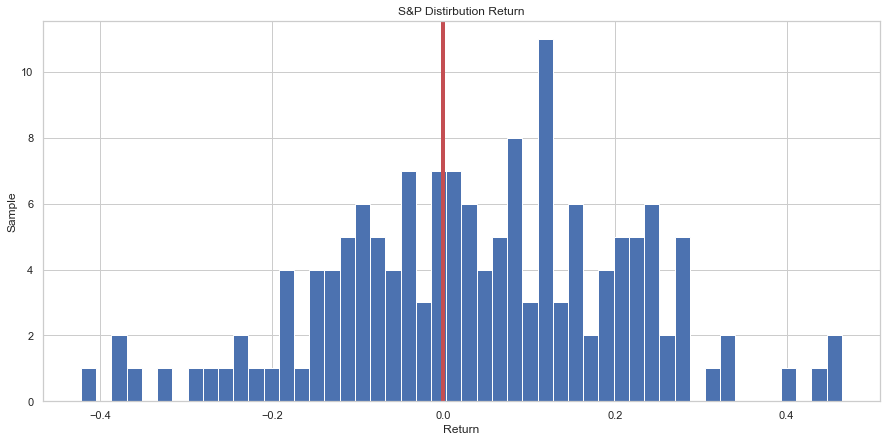

In [141]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
df['annual_return'].hist(bins=50, ax=ax1)
ax1.set_xlabel('Return')
ax1.set_ylabel('Sample')
ax1.set_title('S&P Distirbution Return')
plt.axvline(x=0, color='r', linewidth=4, linestyle='-')
plt.show()

## Returns other the weekdays

In [17]:
#Create lists to store the daily simple return DSR for each day
Mon =[]
Tues=[]
Wed=[]
Thurs=[]
Fri=[]
Sat=[]
Sun=[]

In [18]:
def get_dsr(day, dsr):
    if day == 'Monday':
        Mon.append(float(dsr))
    elif day == 'Tuesday':
        Tues.append(float(dsr))
    elif day == 'Wednesday':
        Wed.append(float(dsr))
    elif day == 'Thursday':
        Thurs.append(float(dsr))
    elif day == 'Friday':
        Fri.append(float(dsr))
    elif day == 'Saturday':
        Sat.append(float(dsr))
    elif day == 'Sunday':
        Sun.append(float(dsr))
    else:
        print('Something is wrong with the input for the day')


In [19]:
#https://www.youtube.com/watch?v=JhwPt2XI9oM
df_merged = df_merged.set_index(pd.DatetimeIndex(df_merged['Date'].values))
DSR = df_merged['S&P 500'].pct_change(1) # computing daily simple return
df_merged['DSR'] = DSR

In [20]:
df_merged = df_merged[1:] #remove first row

In [21]:
# Create a loop to gather the daily simple return of each day from the data set
for i in range(0, len(df_merged)):
    df_merged_date = str(df_merged.index[i]) # get the current date and casting it as a string 
    df_merged_dsr = df_merged['DSR'][i] # get the current daily simple return 
    df_month = df_merged_date.split('-')[1] # get the current month
    curr_date = df_merged.index[i] # get the current date
    df_weekday = calendar.day_name[curr_date.weekday()] # get the weekday
    
    # add daily simple return to the corresponding list for the day
get_dsr(df_weekday, df_merged_dsr)

In [22]:
# create a function to average the returns of each weekday 
def AVG(day):
    if not day: # if this is true then the list is empty so return 
        return [0]
    else:
        return [sum(day)/len(day)]
        

In [23]:
df_returns = pd.DataFrame(index=['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday'])
# Get the average for each weekday and add the values under the column called AVG
df_returns['AVG']= AVG(Mon) + AVG(Tues) + AVG(Wed) + AVG(Thurs) + AVG(Fri) + AVG(Sat) + AVG(Sun)

In [24]:
df_returns

,AVG
Monday,0.000000
Tuesday,-0.004101
Wednesday,0.000000
Thursday,0.000000
Friday,0.000000
Saturday,0.000000
Sunday,0.000000


In [ ]:
# plot the AVG daily simple returns 
df_returns.plot.bar()

## Sector Distribution 

(503, 9)


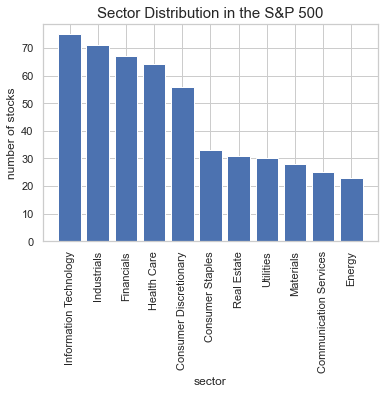

In [25]:
#retrived from https://wire.insiderfinance.io/data-analysis-of-s-p500-stocks-in-python-investment-strategy-during-post-pandemic-a7cf8926ee3e

tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = tables[0]
second_table = tables[1]

df = first_table
print(df.shape)
df["Symbol"] = df["Symbol"].map(lambda x: x.replace(".", "-"))  # rename symbol to escape symbol error
sp500_tickers = list(df["Symbol"])
df.head()

plt.title('Sector Distribution in the S&P 500', fontsize=15)
sectors = df["GICS Sector"].value_counts()
plt.bar(sectors.index, sectors.values)
plt.xticks(rotation=90)
plt.xlabel("sector")
plt.ylabel("number of stocks")
plt.show()

## Rebasing the different paremeters to 100 and see their evolution

In [26]:
df_merged.reset_index(drop=True, inplace=True)
df_merged

,Date,M2,S&P 500,CPI,RE Loan,Initial Claims,Revolving Credit,PMI,daily_return,DSR
0,1871-02-01,NaN,104.02,NaN,NaN,NaN,NaN,NaN,-0.016452,-0.016452
1,1871-03-01,NaN,105.01,NaN,NaN,NaN,NaN,NaN,0.009517,0.009517
2,1871-04-01,NaN,112.01,NaN,NaN,NaN,NaN,NaN,0.066660,0.066660
3,1871-05-01,NaN,117.56,NaN,NaN,NaN,NaN,NaN,0.049549,0.049549
4,1871-06-01,NaN,118.43,NaN,NaN,NaN,NaN,NaN,0.007400,0.007400
...,...,...,...,...,...,...,...,...,...,...
1844,2022-09-01,21459.5,3850.52,296.808,248786.1,NaN,NaN,NaN,-0.026417,-0.026417
1845,2022-09-01,21459.5,3585.62,296.808,248786.1,NaN,NaN,NaN,-0.068796,-0.068796
1846,2022-10-01,21362.5,3726.05,298.012,250692.6,NaN,NaN,NaN,0.039165,0.039165
1847,2022-10-01,21362.5,3871.98,298.012,250692.6,NaN,NaN,NaN,0.039165,0.039165


In [27]:
df_merged = df_merged.loc[1188:] # keep the rows starting in 1970
df_merged.drop(['daily_return','DSR'], axis=1, inplace = True) # to drop two unecessary columns
df_merged.reset_index(drop=True, inplace=True)
df_merged

C:\Users\rapha\AppData\Local\Temp\ipykernel_43296\2658352487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged.drop(['daily_return','DSR'], axis=1, inplace = True) # to drop two unecessary columns


,Date,M2,S&P 500,CPI,RE Loan,Initial Claims,Revolving Credit,PMI
0,1970-02-01,583.4,680.78,38.000,NaN,258500.0,3.80258,47.4
1,1970-03-01,587.3,688.80,38.200,NaN,268250.0,3.90814,46.9
2,1970-04-01,592.9,662.61,38.500,NaN,325250.0,4.03354,45.0
3,1970-05-01,590.8,584.85,38.600,NaN,310400.0,4.13790,47.2
4,1970-06-01,597.5,578.24,38.800,NaN,296500.0,4.28008,51.1
...,...,...,...,...,...,...,...,...
656,2022-09-01,21459.5,3850.52,296.808,248786.1,NaN,NaN,NaN
657,2022-09-01,21459.5,3585.62,296.808,248786.1,NaN,NaN,NaN
658,2022-10-01,21362.5,3726.05,298.012,250692.6,NaN,NaN,NaN
659,2022-10-01,21362.5,3871.98,298.012,250692.6,NaN,NaN,NaN


In [28]:
def rebase(prices):
    return prices/prices[0]*100

In [58]:
df_rebase_1 = pd.DataFrame(rebase(df_merged['S&P 500']))
df_rebase_2 = pd.DataFrame(rebase(df_merged['M2']))
df_rebase_3 = pd.DataFrame(rebase(df_merged['CPI']))
#df_rebase_4 = pd.DataFrame(rebase(df_merged['RE Loan']))
df_rebase_5 = pd.DataFrame(rebase(df_merged['Initial Claims']))
df_rebase_6 = pd.DataFrame(rebase(df_merged['Revolving Credit']))
df_rebase_7 = pd.DataFrame(rebase(df_merged['PMI']))


In [64]:
df_rebase_all = df_rebase_1.join(df_rebase_2).join(df_rebase_3).join(df_rebase_4).join(df_rebase_5).join(df_rebase_6).join(df_rebase_7).join(df_merged['Date'])
#df_rebase_all = df_rebase_all.set_index(pd.DatetimeIndex(df_rebase_all['Date'].values))
#df_rebase_all = df_rebase_all.drop('Date', axis =1)

In [65]:
df_rebase_all

,S&P 500,M2,CPI,RE Loan,Initial Claims,Revolving Credit,PMI,Date
0,100.000000,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,1970-02-01
1,101.178060,100.668495,100.526316,NaN,103.771760,102.776010,98.945148,1970-03-01
2,97.331003,101.628385,101.315789,NaN,125.822050,106.073771,94.936709,1970-04-01
3,85.908810,101.268426,101.578947,NaN,120.077369,108.818223,99.578059,1970-05-01
4,84.937865,102.416867,102.105263,NaN,114.700193,112.557264,107.805907,1970-06-01
...,...,...,...,...,...,...,...,...
656,565.604160,3678.351046,781.073684,NaN,NaN,NaN,NaN,2022-09-01
657,526.692911,3678.351046,781.073684,NaN,NaN,NaN,NaN,2022-09-01
658,547.320720,3661.724374,784.242105,NaN,NaN,NaN,NaN,2022-10-01
659,568.756426,3661.724374,784.242105,NaN,NaN,NaN,NaN,2022-10-01


<AxesSubplot: xlabel='Date', ylabel='S&P 500'>

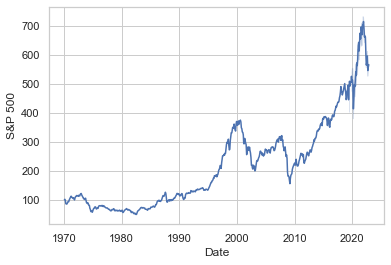

In [67]:
sns.lineplot(data=df_rebase_all, x="Date", y='S&P 500')

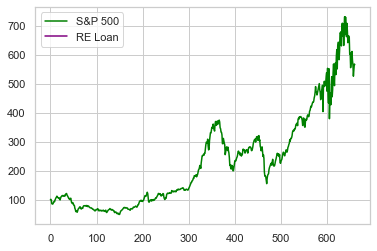

In [63]:
fig, ax = plt.subplots()

ax.plot(df_rebase_1, color = 'green', label = 'S&P 500')
#ax.plot(df_rebase_2, color = 'red', label = 'M2')
#ax.plot(df_rebase_3, color = 'yellow', label = 'CPI')
ax.plot(df_rebase_4, color = 'purple', label = 'RE Loan')
#ax.plot(df_rebase_5, color = 'grey', label = 'Initial Claims')
#ax.plot(df_rebase_6, color = 'brown', label = 'Revolving Credit')
#ax.plot(df_rebase_7, color = 'black', label = 'PMI')
ax.legend(loc = 'upper left')
plt.show()

In [44]:
import functools as ft

df_rebased_all = [df_rebase_1, df_rebase_2, df_rebase_3 ,
                  df_rebase_4 ,df_rebase_5 ,df_rebase_6 ,df_rebase_7]

df_rebased_all = [df.set_index('S&P 500') for df in df_rebased_all] #if all index are the same this can be left out
dfs[0].join(dfs[1:])


KeyError: "None of ['S&P 500'] are in the columns"